In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
import statsmodels.tsa.api as smt
from os import path

In [3]:
df = pd.read_csv(os.path.join("data","Demand for a doubleknit fabric p269 Montgomery Fore  TS.csv"),index_col=0)
df.head()

,x
1,656
2,659
3,601
4,624
5,545


In [4]:
df.describe()

,x
count,240.000000
mean,591.583333
std,49.393406
min,467.000000
25%,560.750000
50%,600.000000
75%,625.500000
max,704.000000


Text(0.5, 1.0, 'Спрос на ткань двойного переплетения по месяцам')

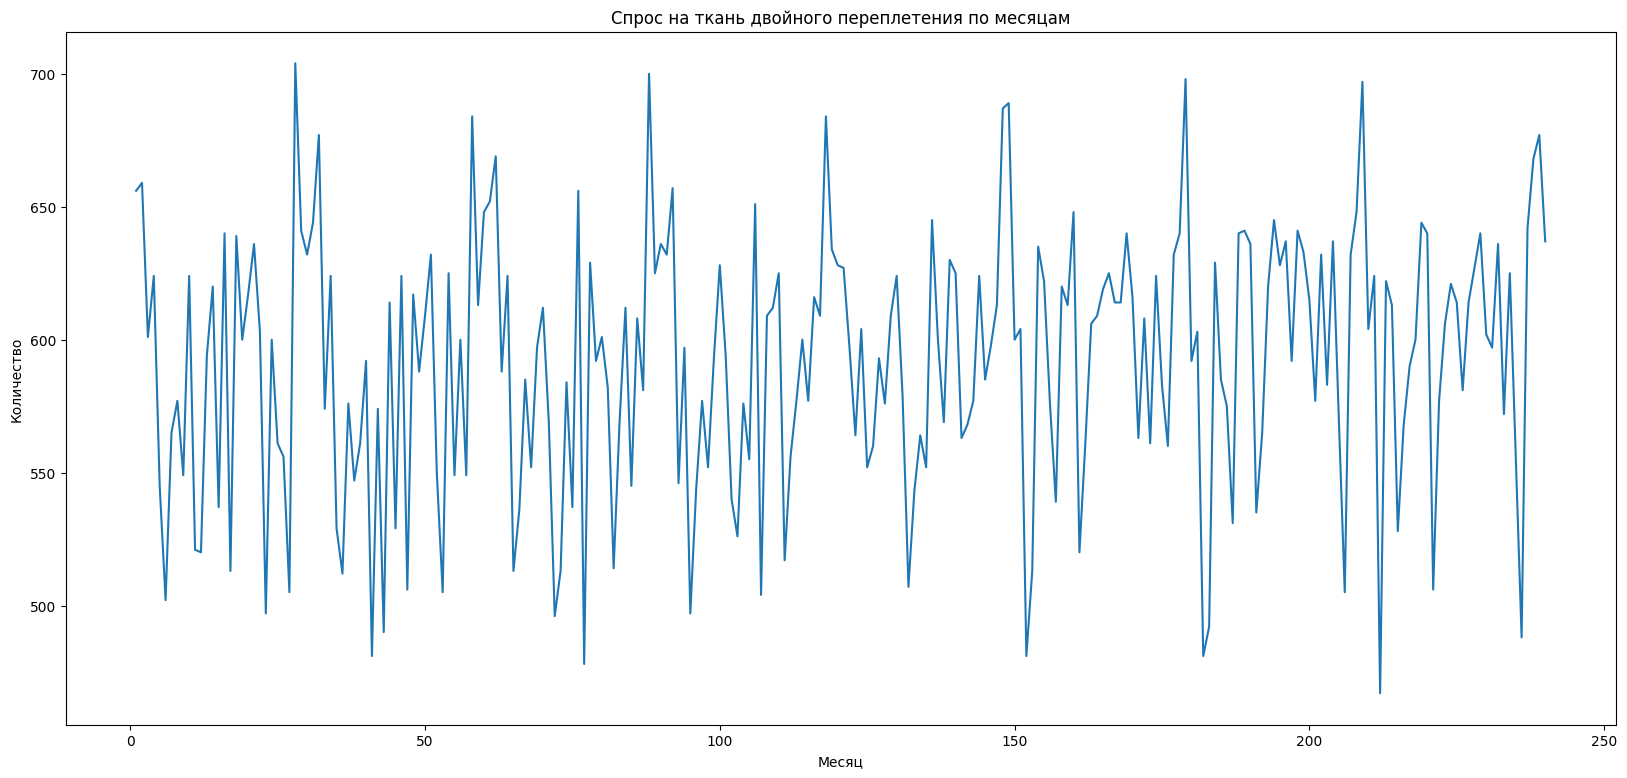

In [5]:
plt.figure(figsize=(20,9))
plt.plot(df)
plt.xlabel("Месяц")
plt.ylabel("Количество")
plt.title("Спрос на ткань двойного переплетения по месяцам")

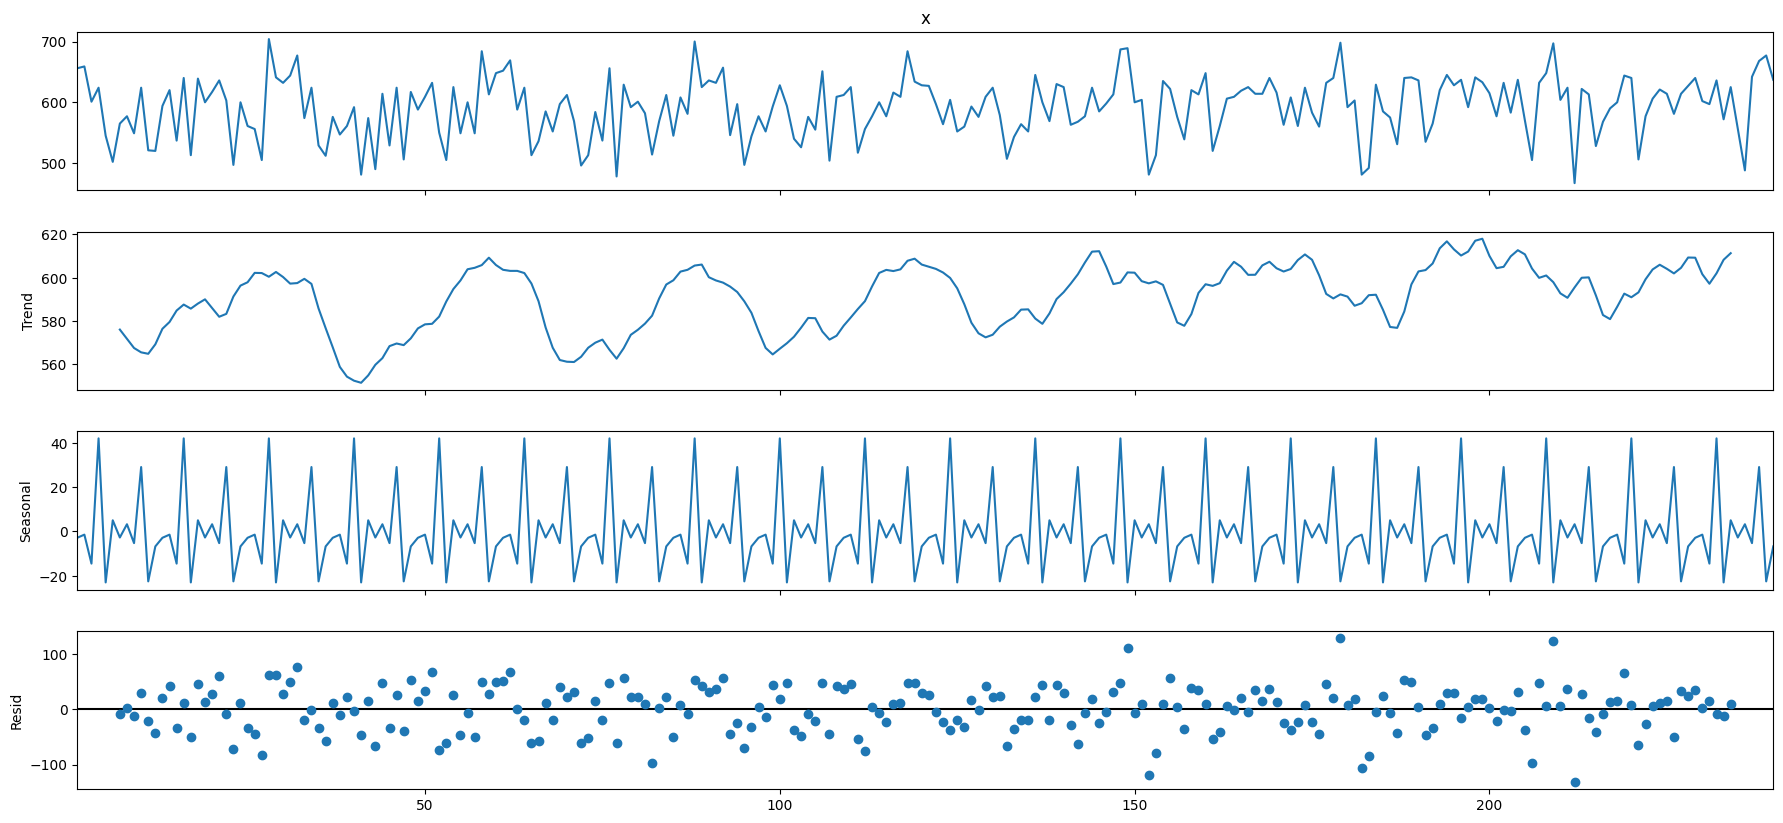

In [6]:
#Разложение в аддитивный ряд

decompose_add = seasonal_decompose(df["x"],model="additive",period=12)

fig = decompose_add.plot()
fig.set_figheight(9)
fig.set_figwidth(20)
plt.show()

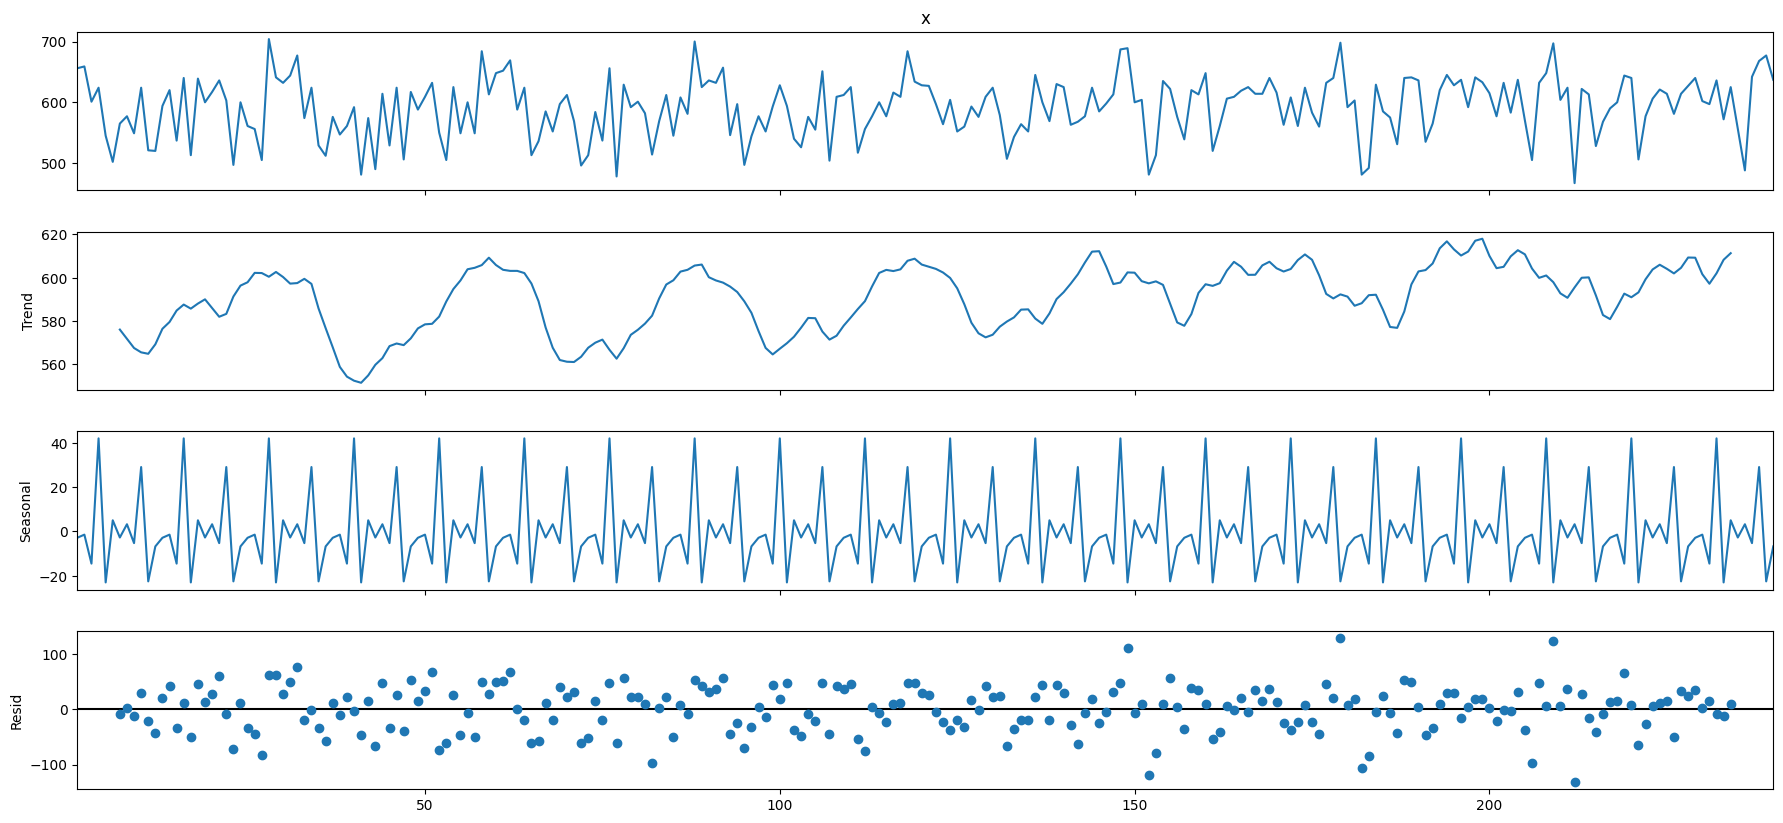

In [7]:
#Разложение в мультипликативный ряд

decompose_mul = seasonal_decompose(df["x"],model="multiplicative",period=12)

fig = decompose_add.plot()
fig.set_figheight(9)
fig.set_figwidth(20)
plt.show()

In [8]:
#Проверка ряда на стационарность

alpha = 0.05
name = "Спрос на ткань"
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Спрос на ткань :
Test Statistic                  -4.922958
p-value                          0.000031
#Lags Used                      12.000000
Number of Observations Used    227.000000
Critical Value (1%)             -3.459490
Critical Value (5%)             -2.874358
Critical Value (10%)            -2.573602
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


Text(0.5, 1.0, 'Собранный аддитивный ряд спроса на ткань двойного переплетения по месяцам')

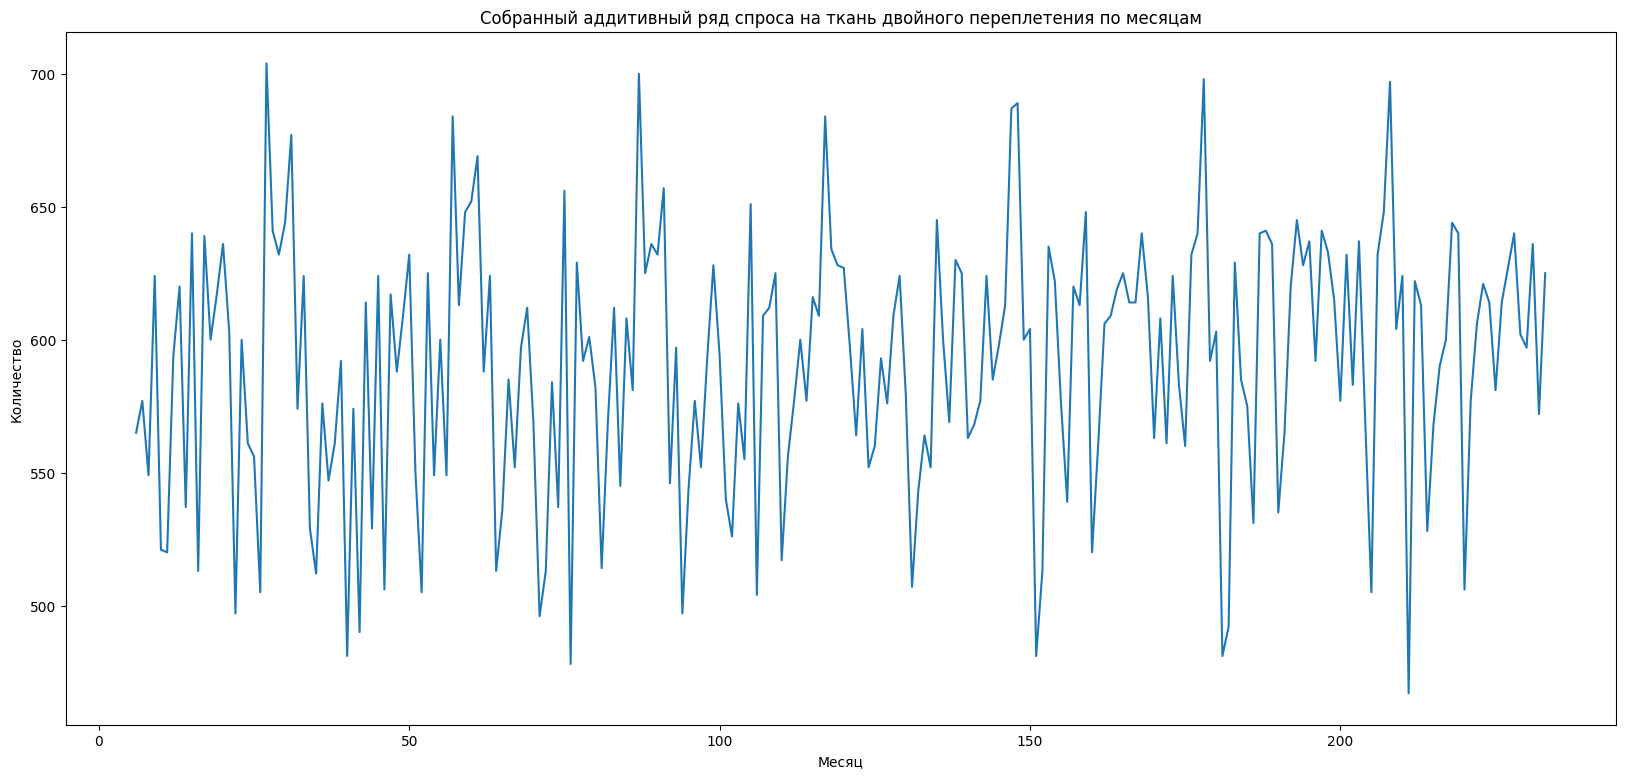

In [9]:
#Сбор аддитивного ряда

add_series = decompose_add.trend + decompose_add.seasonal + decompose_add.resid

plt.figure(figsize=(20,9))
plt.plot(np.arange(len(add_series)),add_series)
plt.xlabel("Месяц")
plt.ylabel("Количество")
plt.title("Собранный аддитивный ряд спроса на ткань двойного переплетения по месяцам")


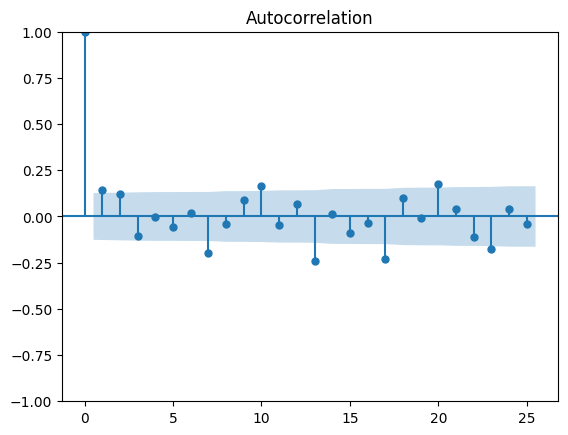

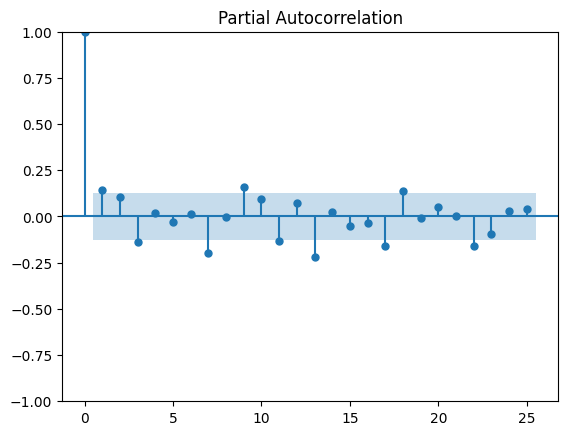

In [13]:
#Построение автокореляции и коррелограмма

ts = df["x"]

A = smt.graphics.plot_acf(ts,lags=25)

B = smt.graphics.plot_pacf(ts,lags=25)